# CVAT によるアノテーション

[CVAT](https://github.com/openvinotoolkit/cvat) と連携し、データセットにアノテーションを行う

## パッケージロード

In [1]:
import fiftyone as fo
import fiftyone.zoo as foz

## データ取得

In [2]:
dataset_dir = "samples"
name = "sample_dataset"

# ローカルのディレクトリーから読み込む
dataset = fo.Dataset.from_dir(
    dataset_dir=dataset_dir,
    dataset_type=fo.types.ImageDirectory,
    name=name,
)

 100% |█████████████████████| 2/2 [13.9ms elapsed, 0s remaining, 143.5 samples/s]    


In [3]:
# 永続化
dataset.persistent = True


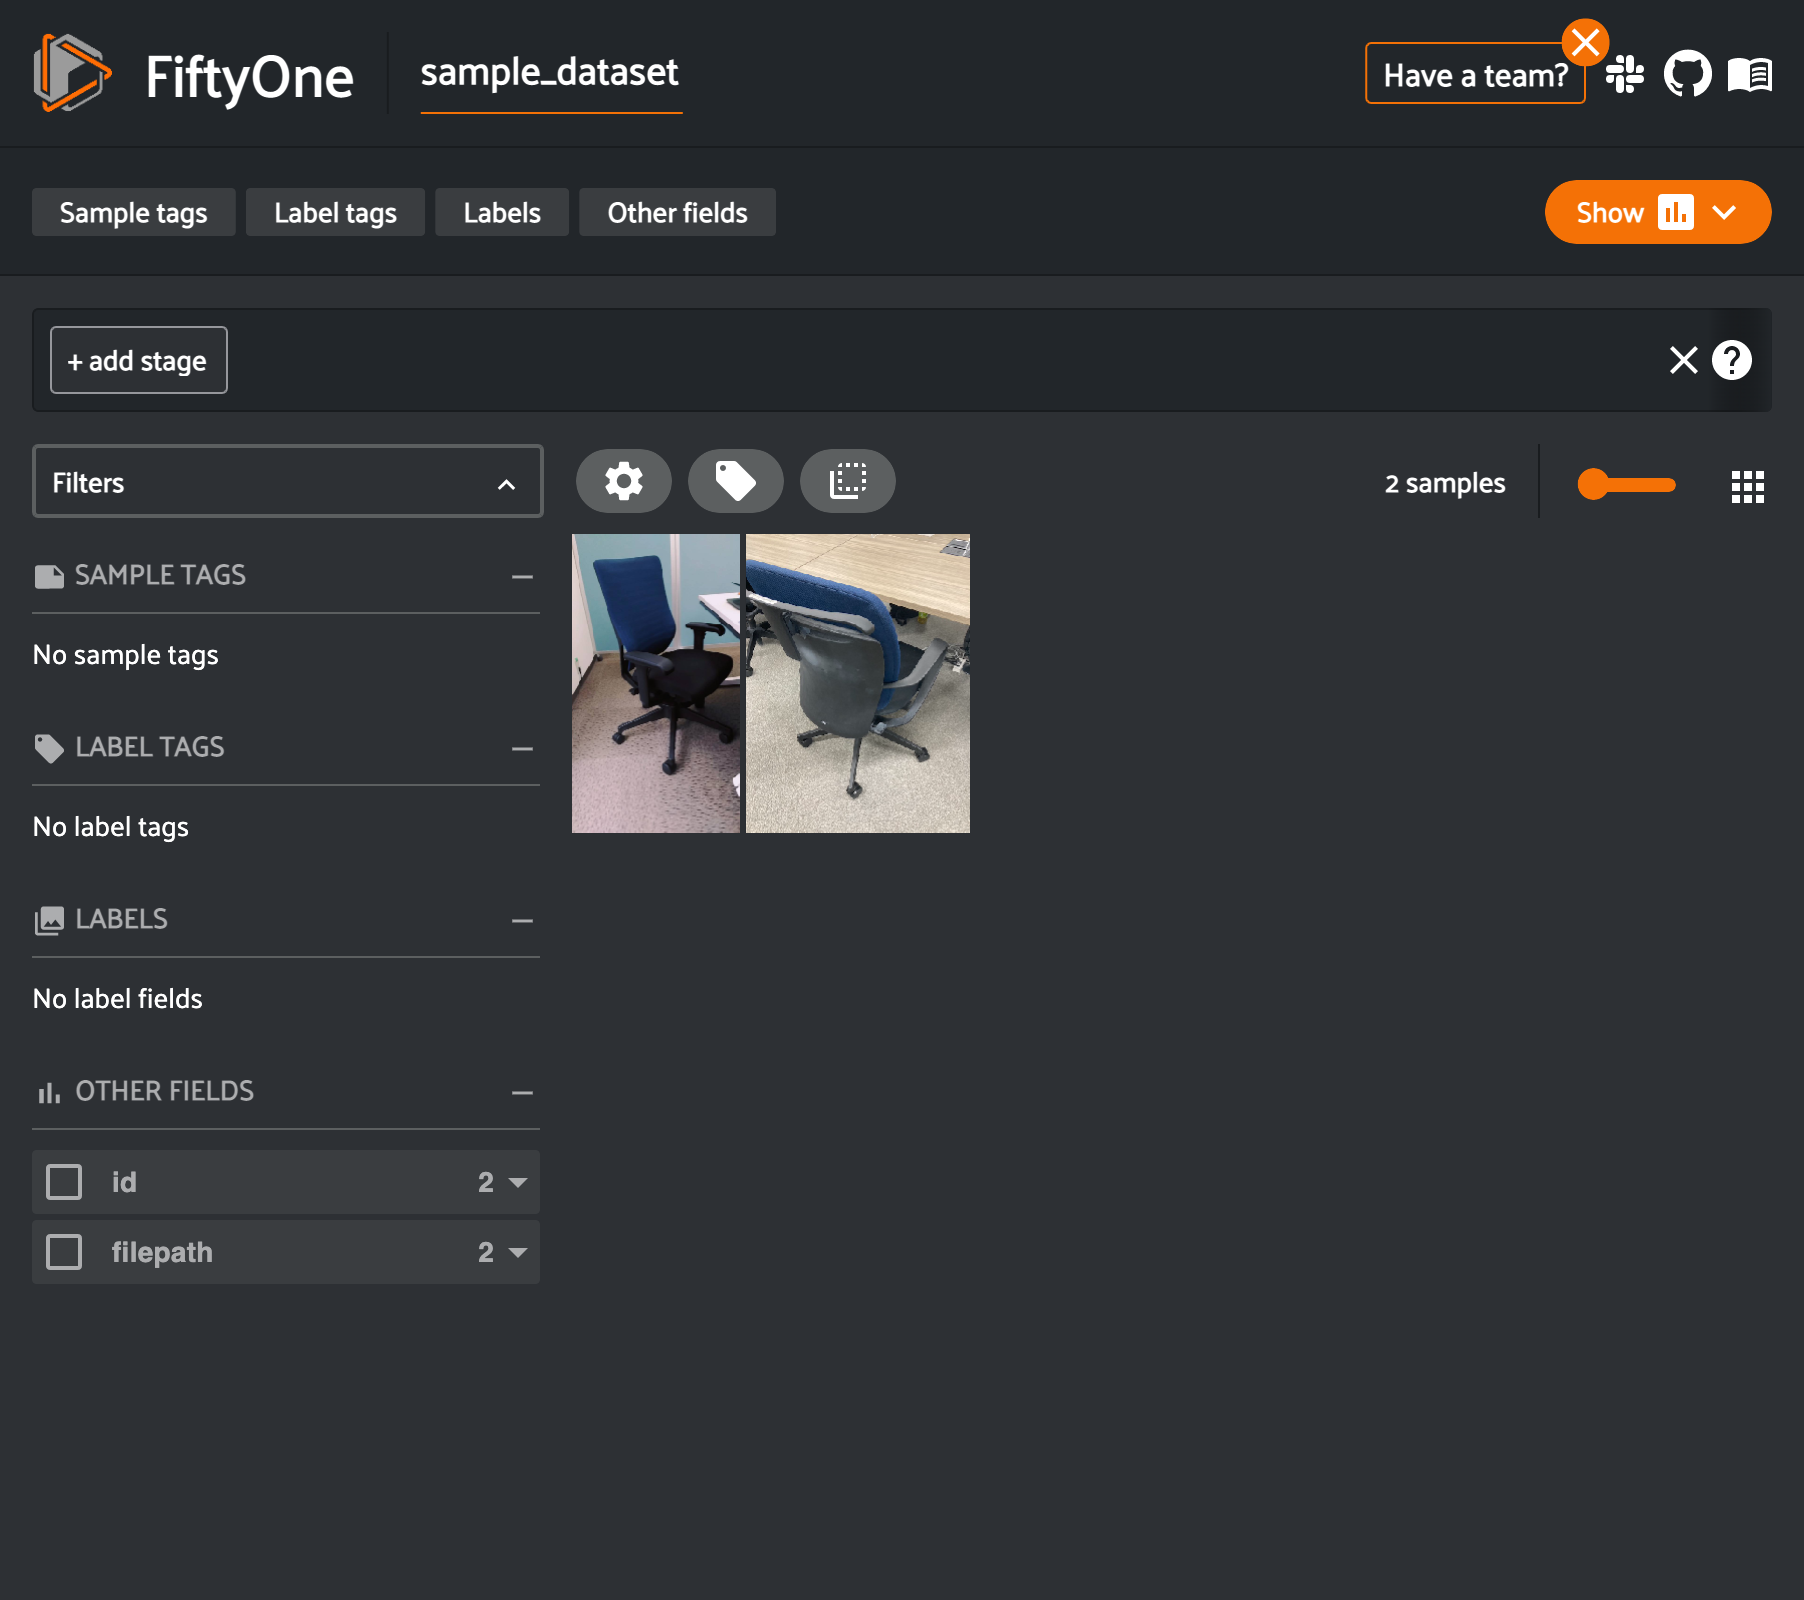

In [4]:
# データセットの表示
session = fo.launch_app(dataset)

In [5]:
session.freeze()

## CVAT との連携

先にローカルで CVAT を起動しておく

minikube などで docker を動かしている場合、 localhost を `minikube ip` の値に変更する

下記の例では、hosts に `docker.local` = `minikube ip` の値として設定している

In [6]:
# CVAT の URL を指定する（http://localhost:8080 など）
CVAT_URL = "http://docker.local:8080"

anno_key = "detation_annotation"

CVAT にデータセットのデータをアップロードし、ブラウザで開く

2回ユーザー名とパスワードの入力を求められるので、入力する

In [7]:
anno_results = dataset.annotate(
    anno_key,
    label_field="detections",
    label_type="detections",
    classes=["chair"],
    launch_editor=True,
    url=CVAT_URL,
)

Please enter your login credentials.
You can avoid this in the future by setting your `FIFTYONE_CVAT_USERNAME` and `FIFTYONE_CVAT_PASSWORD` environment variables


Username:  cvat
Password:  ····


Uploading samples to CVAT...
Computing image metadata...
 100% |█████████████████████| 2/2 [2.9s elapsed, 0s remaining, 0.7 samples/s] 
Upload complete
Please enter your login credentials.
You can avoid this in the future by setting your `FIFTYONE_CVAT_USERNAME` and `FIFTYONE_CVAT_PASSWORD` environment variables


Username:  cvat
Password:  ····


Launching editor at 'http://docker.local:8080/tasks/2/jobs/2'...


CVAT がブラウザで開く

![CVAT ログイン](imgs/cvat-login.png)

ユーザー名とパスワードを入力すると、データセットの画像が開く

![CVAT 画面](imgs/cvat-open.png)

左メニューの OpenCV ロゴマークの下にある四角形にカーソルを合わせると、
_Draw new rectangle_ というポップアップが開く

_Shape_ をクリックすると、四角形を描くモードになる

![CVAT 画面](imgs/cvat-shape.png)

学習したい対象物の左上と右下、もしくは左下と右上でクリックすると、対象物が四角形で囲まれる

![CVAT 画面](imgs/cvat-annotate.png)

右メニューの Objects に囲った物体が追加されるので、ラベルを入力する

![CVAT 画面](imgs/cvat-objects.png)

左上の Save アイコンをクリックし、結果を保存する

![CVAT 画面](imgs/cvat-save.png)

画面上部の `>` をクリックすると次の画像が表示される

![CVAT 画面](imgs/cvat-page.png)

全ての画像でアノテーションが完了したら左上 _Menu_ ボタンから _Finish the job_ をクリックする

![CVAT 画面](imgs/cvat-finish.png)

確認ダイアログが表示されるので、 _Continue_ をクリックする

![CVAT 画面](imgs/cvat-confirm.png)

実行したジョブが _completed_ になっている

![CVAT 画面](imgs/cvat-completed.png)


## アノテーション結果の確認

In [8]:
anno_results.print_status()

Please enter your login credentials.
You can avoid this in the future by setting your `FIFTYONE_CVAT_USERNAME` and `FIFTYONE_CVAT_PASSWORD` environment variables


Username:  cvat
Password:  ····



Status for label field 'detections':

	Task 2 (FiftyOne_sample_dataset_detections):
		Status: completed
		Assignee: None
		Last updated: 2021-10-28T03:01:09.173941Z
		URL: http://docker.local:8080/tasks/2

		Job 2:
			Status: completed
			Assignee: None
			Reviewer: None



Status が _completed_ になっている

In [10]:
# データセットにアノテーション結果を読み込む
dataset.load_annotations(
    anno_key,
    url=CVAT_URL,
    cleanup=True
)

Please enter your login credentials.
You can avoid this in the future by setting your `FIFTYONE_CVAT_USERNAME` and `FIFTYONE_CVAT_PASSWORD` environment variables


Username:  cvat
Password:  ····


Download complete
Loading labels for field 'detections'...
 100% |█████████████████████| 2/2 [10.1ms elapsed, 0s remaining, 198.2 samples/s] 
Please enter your login credentials.
You can avoid this in the future by setting your `FIFTYONE_CVAT_USERNAME` and `FIFTYONE_CVAT_PASSWORD` environment variables


Username:  cvat
Password:  ····


Deleting tasks...
 100% |█████████████████████| 1/1 [100.1ms elapsed, 0s remaining, 10.0 samples/s] 



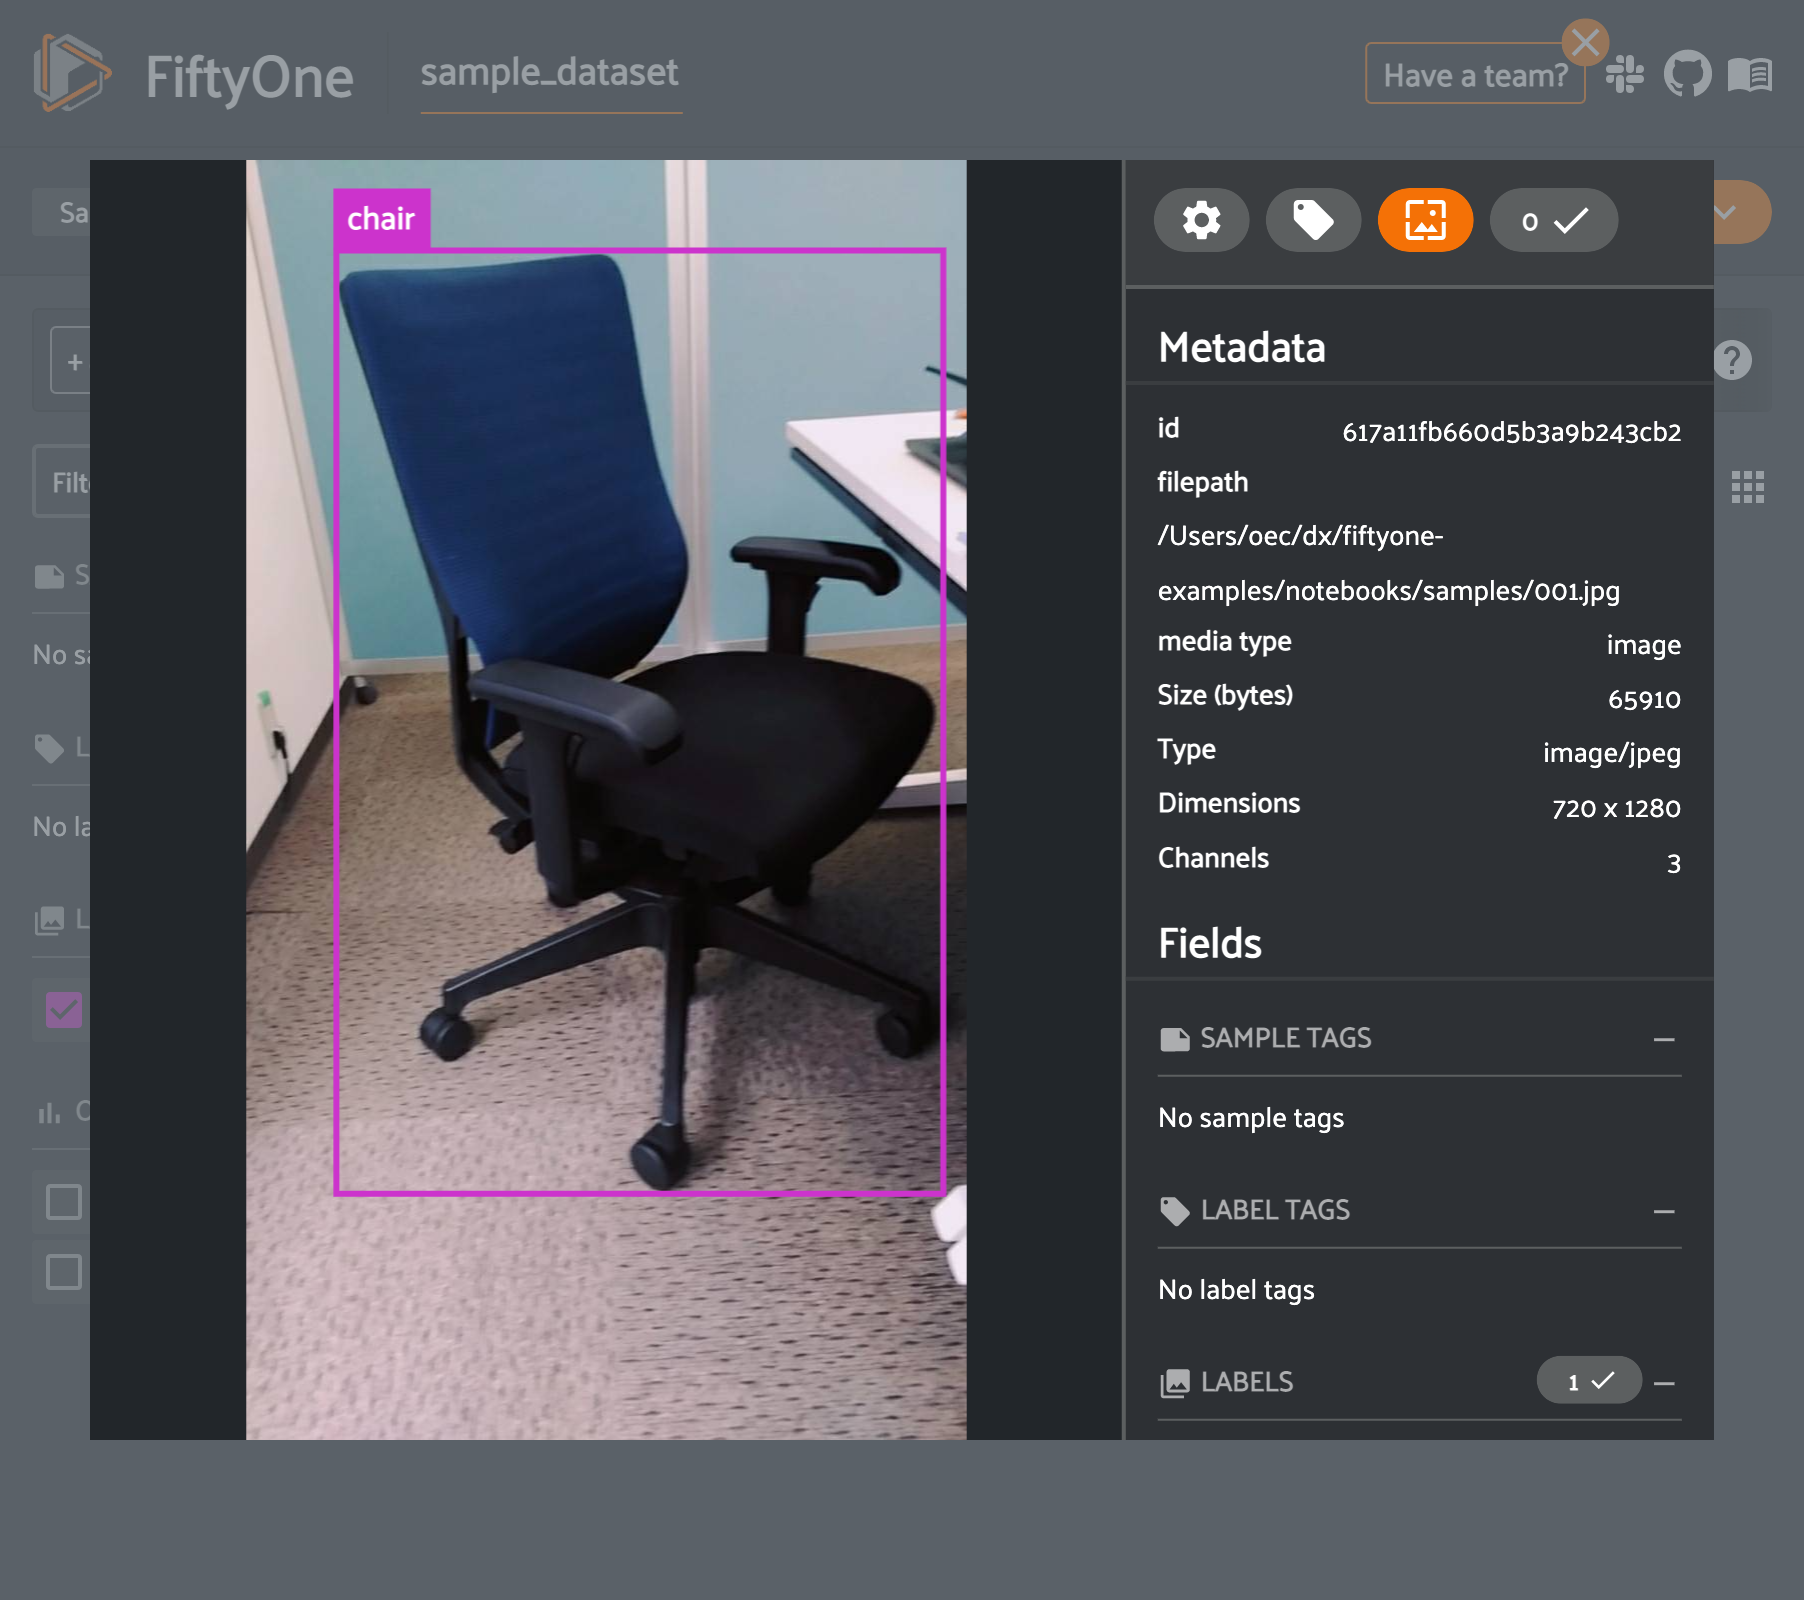

In [11]:
# 結果を表示する
session = fo.launch_app(dataset)

In [12]:
session.freeze()